In [13]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

In [2]:
adata = sc.read('../../data/raw/data_merged.h5ad')

In [7]:
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log10(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)
mt_gene_mask = [gene.startswith('mt-') for gene in adata.var_names]
mt_gene_index = np.where(mt_gene_mask)[0]
adata.obs['mt_fraction'] = adata.X[:,mt_gene_index].sum(1) / adata.X.sum(1)

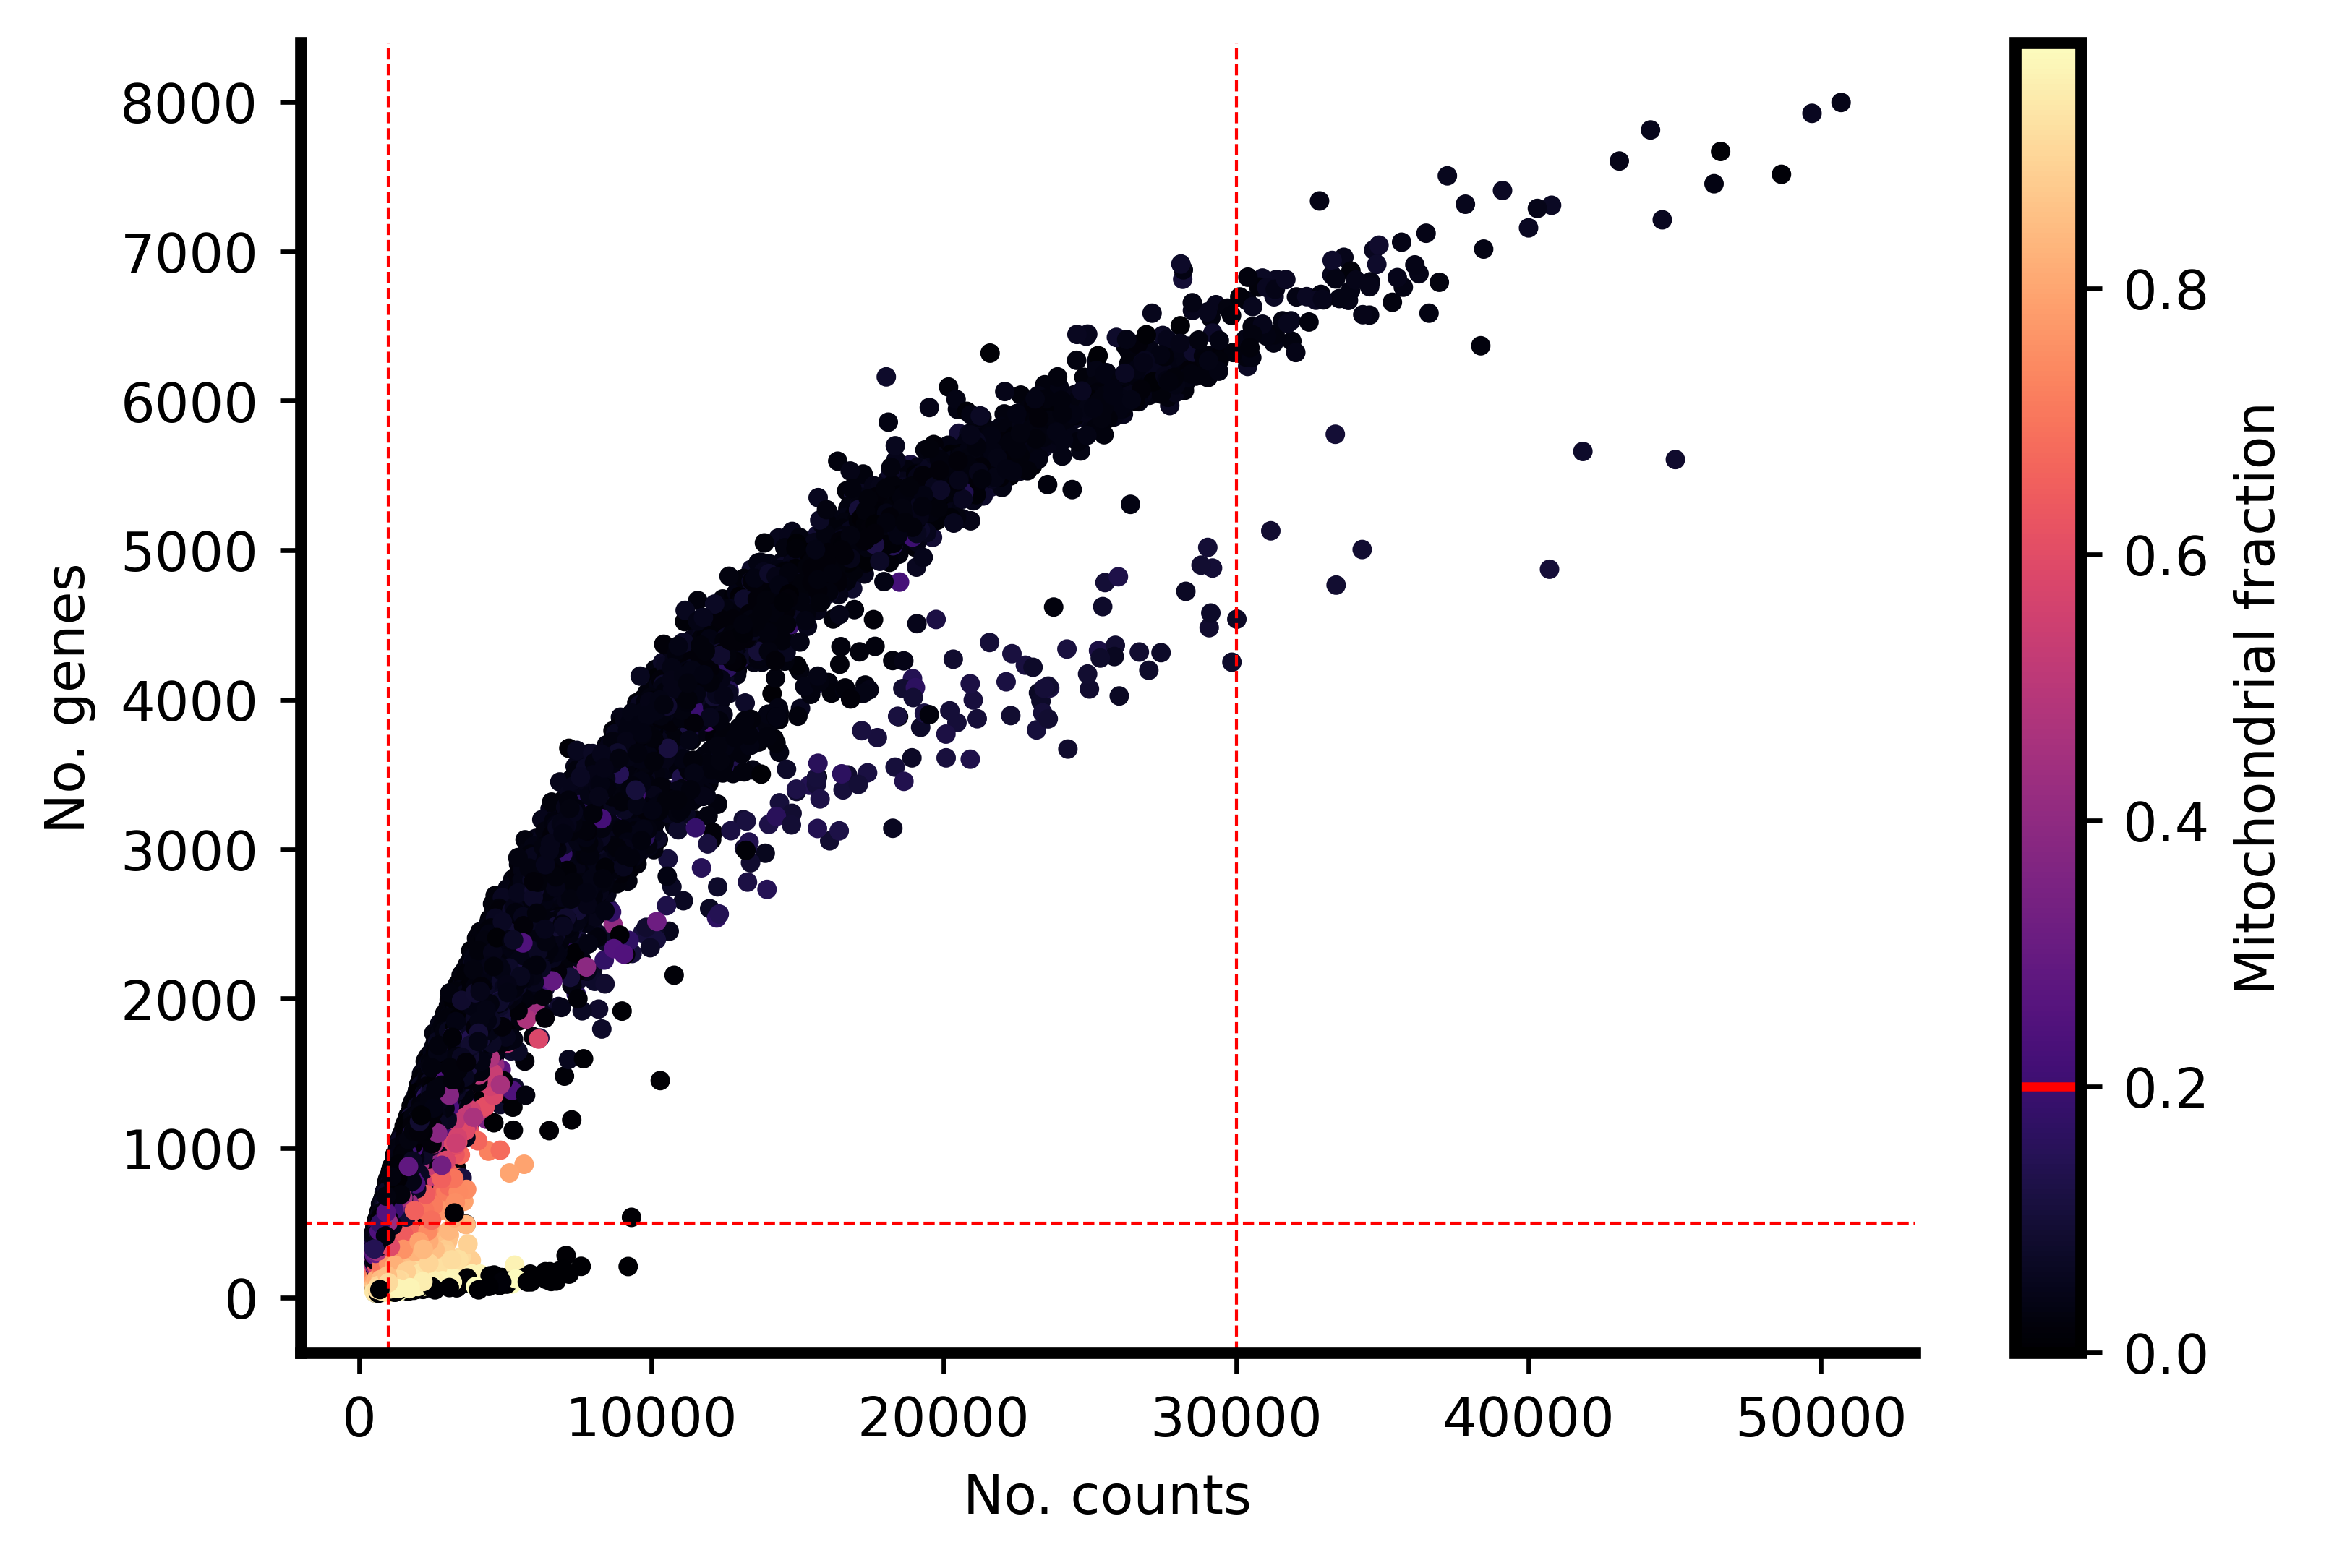

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
p = ax.scatter(adata.obs['n_counts'], adata.obs['n_genes'], c=adata.obs['mt_fraction'], s=5, cmap='magma')
ax.axhline(500, c='red', linestyle='--', linewidth=0.5)
ax.axvline(1000, c='red', linestyle='--', linewidth=0.5)
ax.axvline(30000, c='red', linestyle='--', linewidth=0.5)
sns.despine()
cbar = plt.colorbar(p)
cbar.ax.axhline(0.2, color='red')
cbar.set_label('Mitochondrial fraction')
ax.set_ylabel('No. genes')
ax.set_xlabel('No. counts')
fig.savefig('qc_plot.pdf', bbox_inches='tight')

In [21]:
adata = sc.read('../../data/processed/adata_annotated.h5ad')

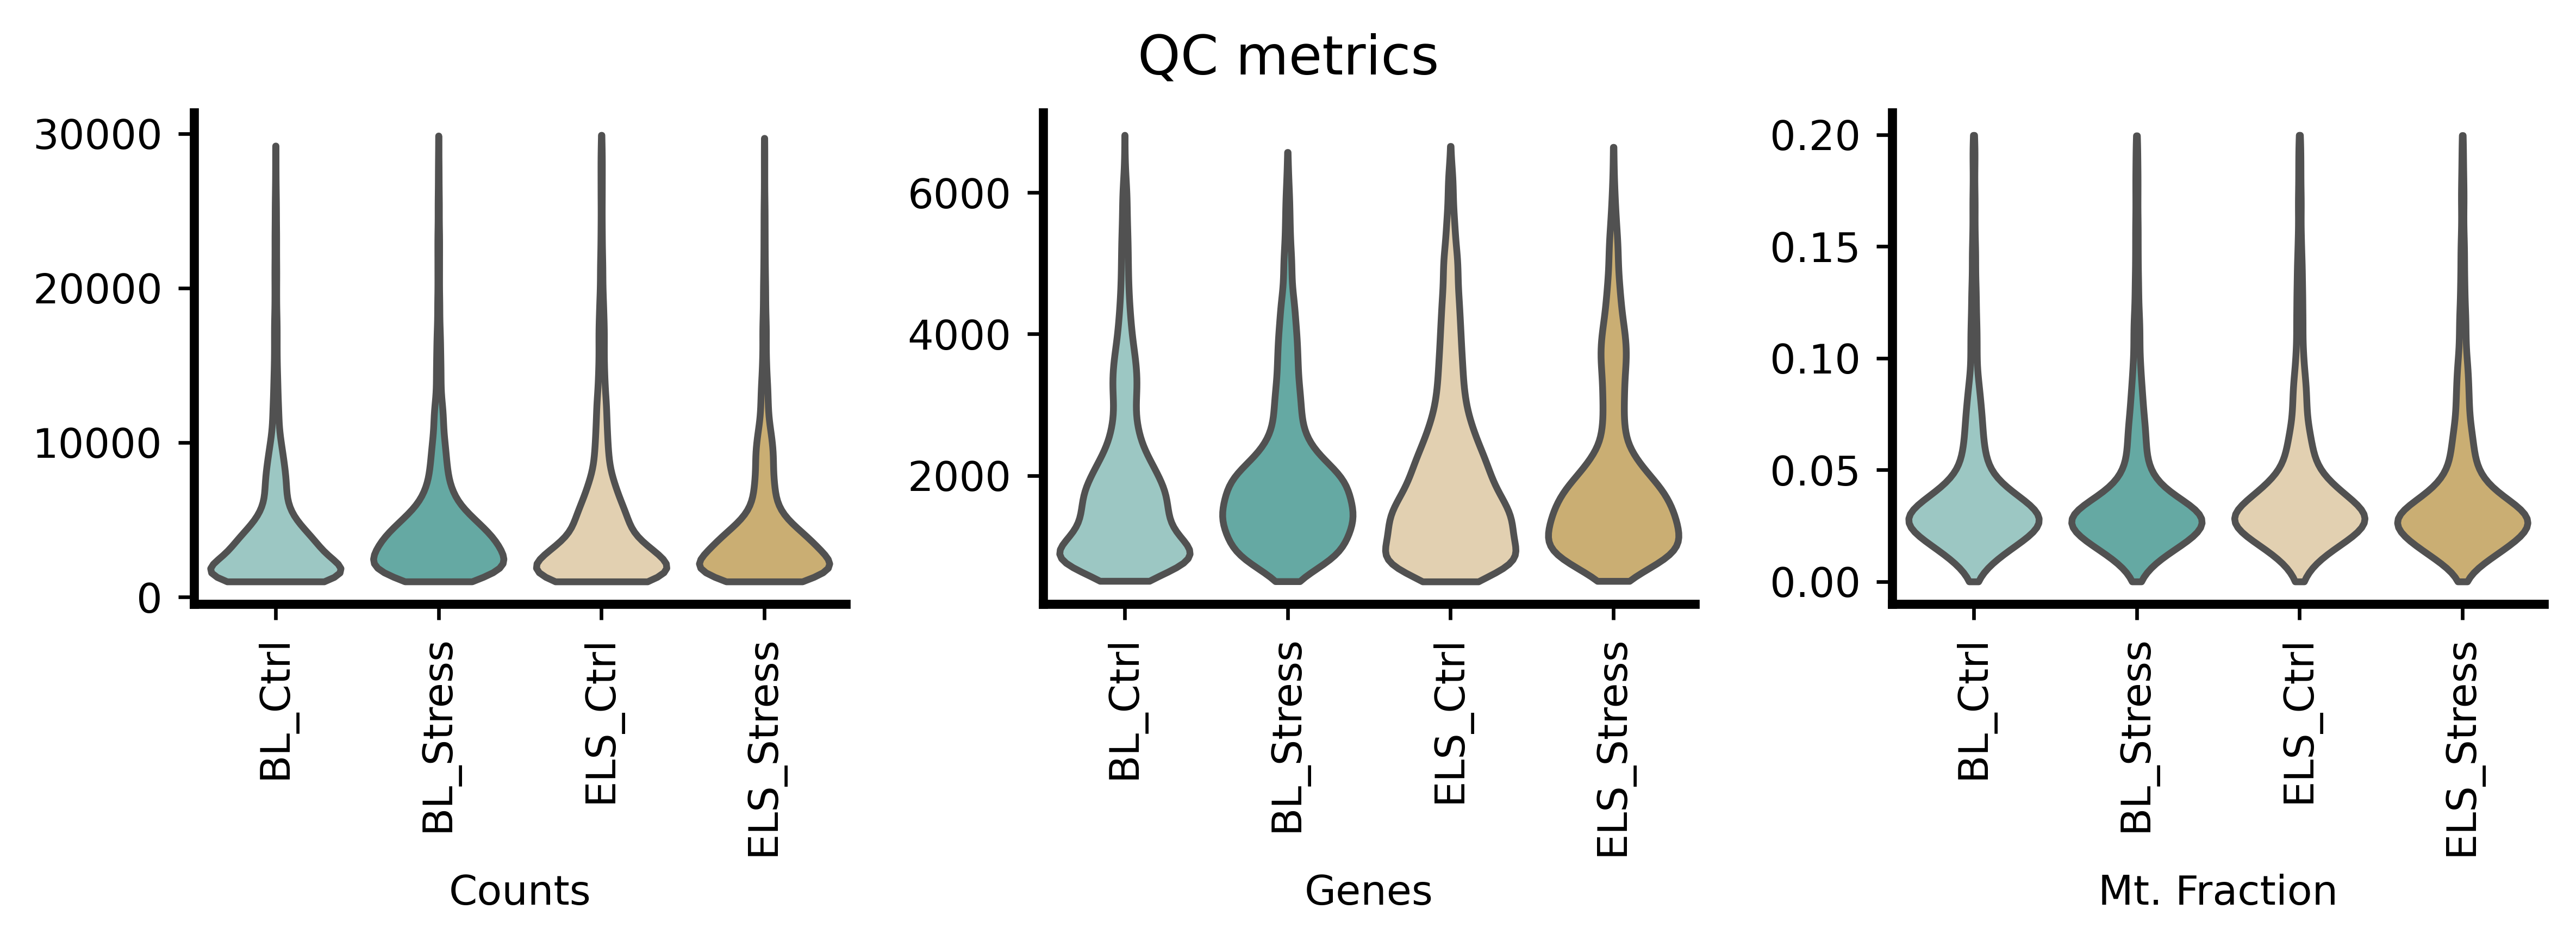

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
sc.pl.violin(
    adata, 
    keys='n_counts', 
    groupby='condition', 
    show=False, 
    ax=ax[0], 
    stripplot=False,
    palette=['#95CEC9', '#5AB4AC', '#EAD2A9', '#D8B365']
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_ylabel('')
ax[0].set_xlabel('Counts')
ax[0].grid(False)
sc.pl.violin(
    adata, 
    keys='n_genes', 
    groupby='condition', 
    show=False, 
    ax=ax[1], 
    stripplot=False,
    palette=['#95CEC9', '#5AB4AC', '#EAD2A9', '#D8B365']
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_ylabel('')
ax[1].set_xlabel('Genes')
ax[1].grid(False)
sc.pl.violin(
    adata, 
    keys='mt_fraction', 
    groupby='condition', 
    show=False, 
    ax=ax[2], 
    stripplot=False,
    palette=['#95CEC9', '#5AB4AC', '#EAD2A9', '#D8B365']
)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
ax[2].set_ylabel('')
ax[2].set_xlabel('Mt. Fraction')
ax[2].grid(False)
sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("QC metrics")
fig.savefig('qc_metrics.pdf', bbox_inches='tight')